In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
# Load dataset
df = pd.read_csv("C:/Users/Absolomjr/Desktop/final year project dataset/Time-Series_Network_logs.csv")


In [21]:
print("Dataset Overview:")
display(df.head())

Dataset Overview:


,Timestamp,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,192.168.54.167,220.159.139.17,443,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,192.168.193.254,201.83.205.167,80,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,192.168.91.17,211.0.177.164,21,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,192.168.108.75,187.49.21.67,22,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,192.168.245.254,189.62.16.12,53,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal


In [22]:
outlier_cols = ["Port", "Payload_Size"]

def detect_outliers_iqr(outlier_cols):
    Q1 = outlier_cols.quantile(0.25)
    Q3 = outlier_cols.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

df_clipped = df.copy()

for col in outlier_cols:
    lower, upper = detect_outliers_iqr(df[col])
    df_clipped[col] = np.clip(df[col], lower, upper)

df_clipped.head()



,Timestamp,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,192.168.54.167,220.159.139.17,167,SSH,ICMP,2954.0,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,192.168.193.254,201.83.205.167,80,FTP,UDP,206.0,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,192.168.91.17,211.0.177.164,21,SSH,ICMP,977.0,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,192.168.108.75,187.49.21.67,22,HTTP,TCP,521.0,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,192.168.245.254,189.62.16.12,53,Telnet,TCP,251.0,Wget/1.20.3,Success,0,Normal


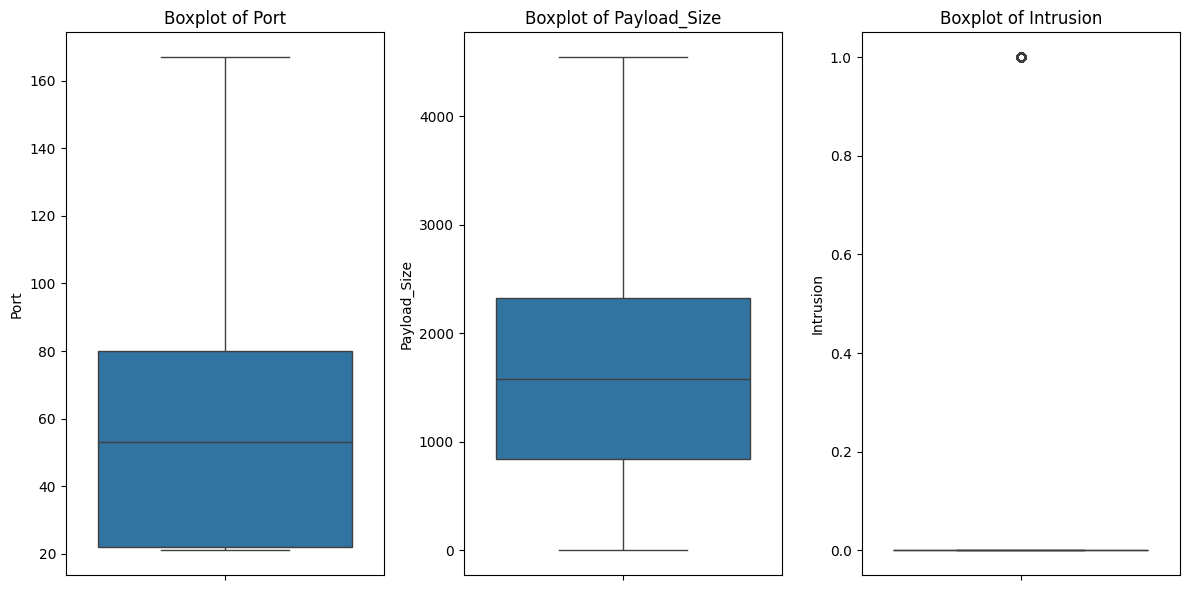

In [23]:
# Identification of numerical columnS because models work with them

numeric_cols = df_clipped.select_dtypes(include=['int64', 'float64']).columns
numeric_cols 
# Box plot for numerical values

plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_clipped[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [24]:
from feature_engine.outliers import Winsorizer

winsorizer = Winsorizer(
    capping_method="iqr",
    tail="both",
    fold=1.5
)

df_winsor = df.copy()
df_winsor[outlier_cols] = winsorizer.fit_transform(df[outlier_cols])
df_winsor.describe()

,Port,Payload_Size,Intrusion
count,8866.000000,8866.000000,8866.000000
mean,67.287503,1602.970350,0.097677
std,55.804319,912.599338,0.296894
min,21.000000,0.000000,0.000000
25%,22.000000,846.250000,0.000000
50%,53.000000,1582.000000,0.000000
75%,80.000000,2326.000000,0.000000
max,167.000000,4545.625000,1.000000


#### to be written in a report

could not use the method of Winsorization(smooth handling because Input columns ['Intrusion'] have low variation for method 'iqr'. Try other capping methods or drop these columns.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [25]:
df_clipped.head()

,Timestamp,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,192.168.54.167,220.159.139.17,167,SSH,ICMP,2954.0,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,192.168.193.254,201.83.205.167,80,FTP,UDP,206.0,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,192.168.91.17,211.0.177.164,21,SSH,ICMP,977.0,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,192.168.108.75,187.49.21.67,22,HTTP,TCP,521.0,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,192.168.245.254,189.62.16.12,53,Telnet,TCP,251.0,Wget/1.20.3,Success,0,Normal


In [26]:
df_clipped.to_csv("../data/processed/dataset_cleaned.csv", index=False)
